Testing how good is our model bringing different data from customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [2]:
dir_in = "C:/Users/barre/Desktop/Machine Learning/projects/bank/in/{}"

In [3]:
df_bal = pd.read_csv(dir_in.format('data_balanced.csv'))
df_bal.head(3) # note that data is already standarized

,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Months_Inactive_12_mon,Target
0,-0.970286,-0.476806,0.763842,-1.463138,1
1,-1.353116,-0.369926,1.407008,-1.463138,1
2,-1.906094,-1.431349,0.120676,-1.463138,1


In [4]:
X = df_bal.drop('Target', axis=1)
y = df_bal['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
model = RandomForestClassifier(max_depth=12, n_estimators=50)
model.fit(X_train, y_train)
print("best score RandomForest:", model.score(X_test, y_test))

best score RandomForest: 0.9101983002832861


For an existing customer, model receives this inputs:
- Number of transactions in latest 12 months
- Revolving Balance
- Number of products that has in the bank
- Inactive time in latest 12 months

#### Random Prediction on original database

In [6]:
df_original = pd.read_csv(dir_in.format('BankData.csv'))
df_original.rename(columns={'Attrition_Flag' : 'Target'}, inplace=True)

target_dict = {'Attrited Customer' : 0,
               'Existing Customer' : 1
              }

df_original['Target'] = df_original['Target'].map(target_dict)

df_original.head(2)

,CLIENTNUM,Target,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33


In [7]:
# relevant cols
cols = ['Total_Trans_Ct', 
        'Total_Revolving_Bal', 
        'Total_Relationship_Count', 
        'Months_Inactive_12_mon']

In [8]:
# function to evaluate the prediction
def evaluate(x, y):
    if x[0] == y['Target']:
        return "Right"
    else:
        return "Wrong"

# function to return type of customer (bor better visualization)
def client_type(x):
    if x==0:
        return "Attrited"
    else:
        return "Existing"

In [10]:
# let's check a random customer
random = np.random.randint(0, df_original.shape[0])
client = df_original.loc[random, :]

print('------ Data of the customer ------')
print(client[cols + ['Target']], "\n")

pred = model.predict(pd.DataFrame(client[cols]).T) # make a prediction of this customer

print("=="*20)
print("prediction for client", client.name, ":", client_type(pred))
print("Prediction is:", evaluate(pred, client))

------ Data of the customer ------
Total_Trans_Ct                85
Total_Revolving_Bal         1093
Total_Relationship_Count       1
Months_Inactive_12_mon         3
Target                         1
Name: 9054, dtype: object 

prediction for client 9054 : Existing
Prediction is: Right


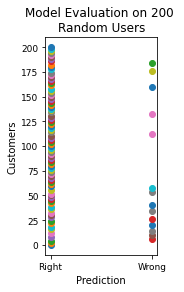

In [44]:
# Let's see the results in graph

plt.figure(figsize=(2,4))

for num in range(0, 202,2):
    random = np.random.randint(0, df_original.shape[0])
    client = df_original.loc[random, :]
    
    pred = model.predict(pd.DataFrame(client[cols]).T) # make a prediction of this customer
    
    plt.plot(evaluate(pred, client), num, 'o')

plt.title(f"Model Evaluation on {num} \nRandom Users")
plt.xlabel("Prediction");
plt.xticks(size=9)
plt.ylabel("Customers");
plt.yticks(size=9);